# STC Jawwy

In [1]:
"""
Here we install libraries that are not installed by default 
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

In [2]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset consists of meta details about the movies and tv shows as genre. 
Also details about Users activities, spent duration and if watching in High definition or standard definition. 
You have to analyse this dataset to find top insights, findings and to solve the four tasks assigned to you.

In [47]:
dataframe = pd.read_excel("stc TV Data Set_T1.xlsb",sheet_name="Final_Dataset")
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [48]:
# check the data shape
dataframe.shape

(1048575, 13)

In [51]:
# display the first 5 rows 
dataframe.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [53]:
# Data Preprocessing on the input data
dataframe = dataframe.drop(columns=['Column1'])         # dropping the index column
dataframe['program_name'] = dataframe['program_name'].str.strip()  # trim spaces in movies names to avoid misspellings in input data
dataframe['date_'] = pd.to_datetime(dataframe['date_'], unit='d', origin='30/12/1899')  # read date column as date data type
dataframe[['duration_seconds', 'season','episode','series_title','hd']] = dataframe[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)  # read numeric columns as numeric data types
dataframe[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = dataframe[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']].astype(str) # read string columns as string data types

TypeError: Invalid datetime unit in metadata string "[d]"

In [55]:
# display the dataset after applying data types
dataframe.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [57]:
# describe the numeric values in the dataset
dataframe.describe()

,date_,user_id_maped,duration_seconds,season,episode,series_title,hd
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.301202e+04,1.709266e+04,1.230957e+03,1.342139e+00,6.157952e+00,1.205922e-02,3.862728e-01
std,1.242834e+02,1.003513e+04,6.821058e+03,2.104095e+00,1.222015e+01,1.091504e-01,4.868946e-01
min,4.280800e+04,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.289600e+04,8.253000e+03,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.302200e+04,1.714900e+04,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,4.312100e+04,2.566500e+04,1.328000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,4.322000e+04,3.428000e+04,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00


In [59]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_               False
user_id_maped       False
program_name        False
duration_seconds    False
program_class       False
season              False
episode             False
program_desc         True
program_genre       False
series_title        False
hd                  False
original_name       False
dtype: bool

# Task 1
##### You are required to work on task one to study and HD flag for available dataset

In [62]:
# make a copy of the dataframe for working on task 1
df=dataframe.copy()

In [64]:
# Here we try to get the most watched movies (Total Views / Total Users Views / Total watch time)
# For series we concatenated the Session episode to differentiate between episodes 
grouped=df.copy()
grouped.loc[grouped['program_class'] == 'SERIES/EPISODES', 'program_name'] = grouped['program_name']+'_SE'+grouped['season'].astype(str)+'_EP'+grouped['episode'].astype(str)
grouped = grouped.groupby(['program_name','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_name','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [68]:
# show the result
grouped.head(10)

,program_name,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,The Boss Baby,MOVIE,3389,24047,2961.350833
1,The Amazing pider-Man,MOVIE,1011,2877,1966.119167
2,The Expendables,MOVIE,853,2119,1961.159444
3,Moana,MOVIE,2173,8081,1706.176944
4,Trolls,MOVIE,2613,13793,1601.023056
5,Bean,MOVIE,949,3617,1423.955000
6,The murfs,MOVIE,867,3132,1342.141111
7,Hotel Transylvania,MOVIE,491,1947,1096.533611
8,Cloudy With a Chance of Meatballs,MOVIE,683,2076,948.674722
9,The Man With The Iron Fists,MOVIE,707,2505,859.626389


In [70]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

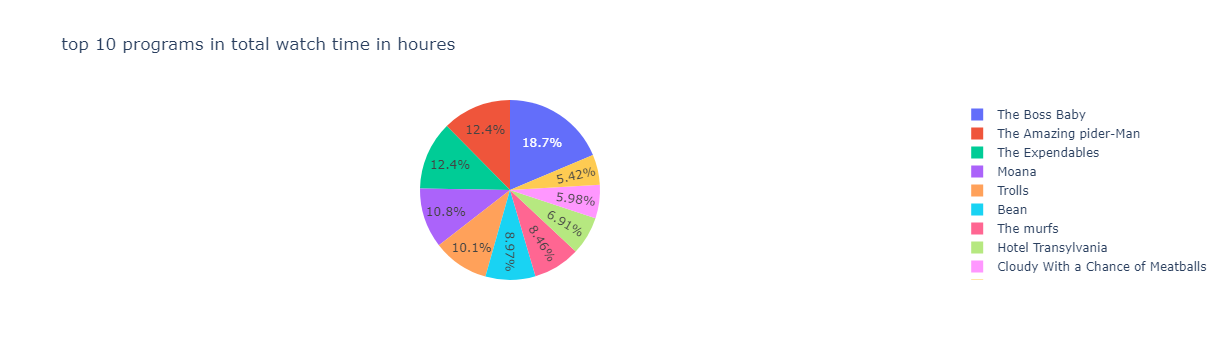

In [72]:
# plot top 10 Programs 
fig = px.pie(grouped.head(10), values='Total watch time in houres', names='program_name',\
             hover_data=['program_class'],title='top 10 programs in total watch time in houres')
fig.show()

In [74]:
# Here we try to study the customer experience against Program class
grouped=df.copy()
grouped = grouped.groupby('program_class')\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [76]:
# show the result
grouped.head()

,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,SERIES/EPISODES,3901,560174,255097.787500
1,MOVIE,11355,488401,103444.145556


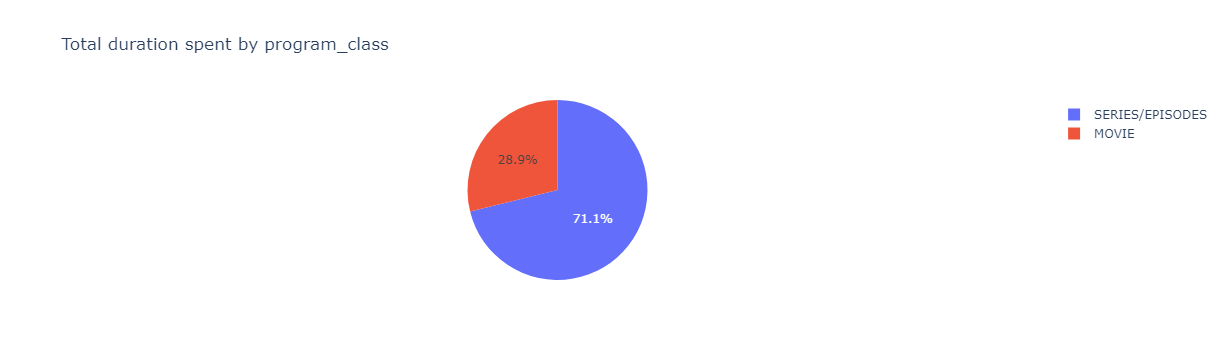

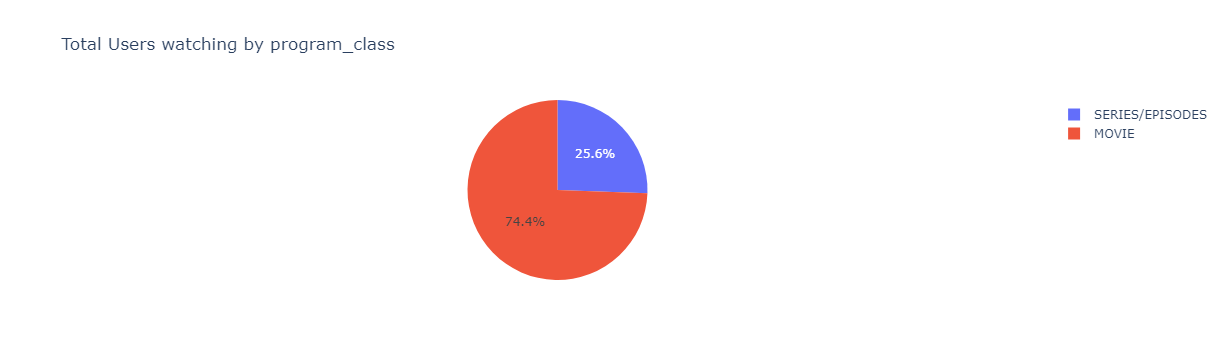

In [78]:
# plot the total watch time against total number of users and report your findings
fig = px.pie(grouped, values='Total watch time in houres', names='program_class',\
             hover_data=['program_class'],title='Total duration spent by program_class')
fig2 = px.pie(grouped, values='No of Users who Watched', names='program_class',\
             hover_data=['program_class'],title='Total Users watching by program_class')

fig.update_traces(sort=False)
fig2.update_traces(sort=False)
fig.show()
fig2.show()

In [120]:
# Calculate the percentage of HD vs SD views
hd_percentage = df['hd'].mean() * 100
sd_percentage = (1 - df['hd'].mean()) * 100

# Aggregate views by 'hd' status
views_by_hd = df.groupby('hd').size()

print("HD Percentage:", hd_percentage)
print("SD Percentage:", sd_percentage)
print("Views by HD Status:\n", views_by_hd)


HD Percentage: 38.62727987983693
SD Percentage: 61.37272012016308
Views by HD Status:
 hd
0    643539
1    405036
dtype: int64


In [123]:
# Aggregate views by 'program_genre' and 'hd' status
views_by_genre_hd = df.groupby(['program_genre', 'hd']).size().unstack().fillna(0)

# Aggregate views by 'user_id_maped' and 'hd' status
views_by_user_hd = df.groupby(['user_id_maped', 'hd']).size().unstack().fillna(0)

print("Views by Genre and HD Status:\n", views_by_genre_hd)
print("Views by User and HD Status:\n", views_by_user_hd)


Views by Genre and HD Status:
 hd                                       0         1
program_genre                                       
Action                            98671.00  75484.00
Adventure                           238.00      1.00
Animation                        253479.00 148251.00
Biography                          4519.00  11616.00
Comedy                            75445.00  61132.00
Crime                               917.00   2315.00
Documentary                        3352.00   9939.00
Drama                            107886.00  47162.00
Family                            22841.00   3827.00
Horror                            49401.00  25905.00
NOT_DEFINED_IN_UMS                   44.00   4491.00
Romance                             512.00      0.00
SERIES_NOT_ADDED_UNDER_ANY_GENRE    216.00      0.00
Sci-Fi                             1188.00    134.00
Thriller                          24822.00  14779.00
Wrestling                             8.00      0.00
Views by User a

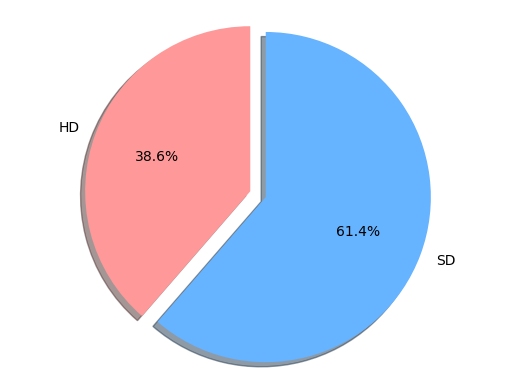

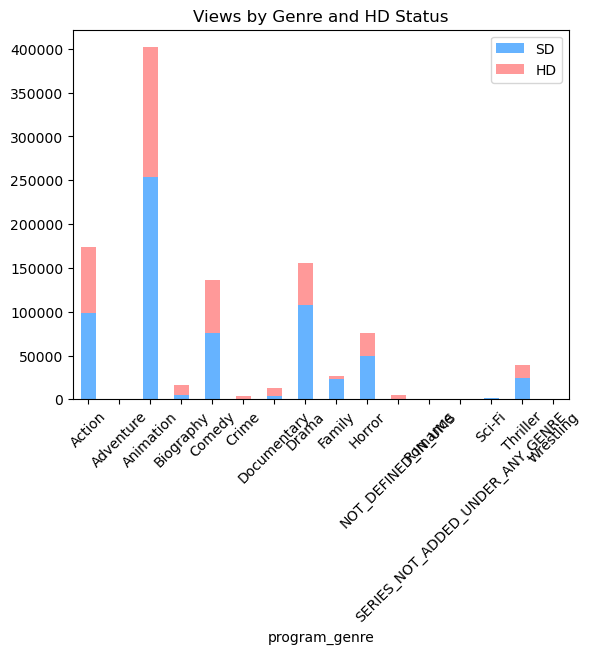

In [129]:
import matplotlib.pyplot as plt

# Pie chart for HD vs SD views
labels = ['HD', 'SD']
sizes = [hd_percentage, sd_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Bar chart for views by genre and HD status
views_by_genre_hd.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'])
plt.title('Views by Genre and HD Status')

plt.legend(['SD', 'HD'])
plt.xticks(rotation=45)
plt.show()
